In [1]:
!pip install wordcloud

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
alice_novel = open('alice.txt', 'r').read()

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [6]:
stopwords = set(STOPWORDS)

In [7]:
alice_wc = WordCloud(background_color='white',
            max_words = 2000,
            stopwords = stopwords)
alice_wc.generate(alice_novel)

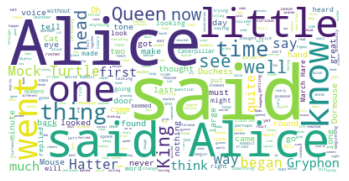

In [10]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

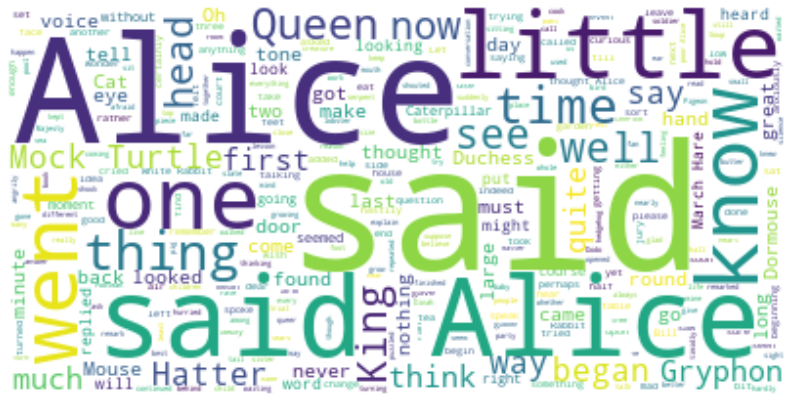

In [13]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
!pip install folium

In [15]:
import folium

In [17]:
world_map = folium.Map()

In [18]:
world_map

In [19]:
import pandas as pd

In [20]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [21]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [23]:
df_incidents.shape

(150500, 13)

In [27]:
limit = 100
df1=df_incidents.iloc[0:limit,:]

In [28]:
df1.shape


(100, 13)

In [41]:
latitude=37.77
longitude=-122.42

In [42]:
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)

In [43]:
sanfran_map

In [44]:
incidents = folium.map.FeatureGroup()
for lat,lng, in zip(df1.Y,df1.X):
    incidents.add_child(
    folium.CircleMarker([lat,lng],
                      radius = 5,
                      color='yellow',
                      fill=True,
                      fill_color='blue',
                      fill_opacity=0.6))
    sanfran_map.add_child(incidents)

In [46]:
incidents = folium.map.FeatureGroup()
for lat,lng, in zip(df1.Y,df1.X):
    incidents.add_child(
    folium.CircleMarker([lat,lng],
                      radius = 5,
                      color='yellow',
                      fill=True,
                      fill_color='blue',
                      fill_opacity=0.6))
    
    latitudes = list(df1.Y)
    longitudes = list(df1.X)
    labels = list(df_incidents.Category)
    for lat, lng, label in zip(latitudes, longitudes, labels):
        folium.Marker([lat,lng], popup = labels).add_to(sanfran_map)
    sanfran_map.add_child(incidents)

KeyboardInterrupt: 

In [56]:
sanfran_map = folium.Map(location=[latitude,longitude],zoom_start = 12)

for lat,lng, labels in zip(df1.Y,df1.X, df_incidents.Category):
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    color='yellow',
    fill=True,
    popup=labels,
    fill_color = 'blue',
    fill_opacity = 0.6
    ).add_to(sanfran_map)

In [57]:
sanfran_map

In [58]:
from folium import plugins

In [59]:
sanfran_map = folium.Map(location = [latitude,longitude], zoom_start=12)

In [66]:
incidents = plugins.MarkerCluster().add_to(sanfran_map)

In [67]:
for lat, lng, labels,in zip (df1.Y,df1.X, df1.Category):
    folium.Marker(
    location=[lat,lng],
    icon=None,
    popup=labels,
    ).add_to(incidents)

In [68]:
sanfran_map

In [69]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hans8626\Anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         165 KB  anaconda
    certifi-2020.6.20          |           py38_0         160 KB  anaconda
    conda-4.9.0                |           py38_0         3.1 MB  anaconda
    openssl-1.1.1g             |       he774522_0         5.8 MB  anaconda
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> anaconda::conda-4.9.0-py38_0

The following packages will be SUPERSEDED by a higher-priority 



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




openssl-1.1.1g       | 5.8 MB    | #######7   |  78% 
openssl-1.1.1g       | 5.8 MB    | #######8   |  79% 
openssl-1.1.1g       | 5.8 MB    | ########   |  80% 
openssl-1.1.1g       | 5.8 MB    | ########2  |  82% 
openssl-1.1.1g       | 5.8 MB    | ########4  |  84% 
openssl-1.1.1g       | 5.8 MB    | ########6  |  87% 
openssl-1.1.1g       | 5.8 MB    | ########9  |  90% 
openssl-1.1.1g       | 5.8 MB    | #########2 |  93% 
openssl-1.1.1g       | 5.8 MB    | #########5 |  95% 
openssl-1.1.1g       | 5.8 MB    | #########7 |  97% 
openssl-1.1.1g       | 5.8 MB    | ########## | 100% 

xlrd-1.2.0           | 108 KB    |            |   0% 
xlrd-1.2.0           | 108 KB    | ####4      |  44% 
xlrd-1.2.0           | 108 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [71]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=True',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter=2)
print('Data downloaded and read into a dataframe!')


Data downloaded and read into a dataframe!


In [72]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [73]:
print(df_can.shape)

(195, 43)


In [74]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [83]:
df_can.rename(columns={'OdName':'Country',
                      'AreaName':'Continent',
                       'DevName':'C. Status',
                      'RegName':'Region'},
             inplace=True)

In [84]:
df_can.columns = list(map(str, df_can.columns))

In [85]:
df_can['Total'] = df_can.sum(axis=1)

In [86]:
years = list(map(str, range(1980,2014)))
print('data dimensions:',df_can.shape)

data dimensions: (195, 39)


In [87]:
df_can.head()

Country Continent           Region           C. Status  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013   Total  
0  2635  2004  117278  
1   620   603   31398  
2  3774  4331  138878  
3     0     0      12  
4     1     1      30  

[5 rows x 39 columns]

In [94]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=7786f2b85eaae63f860744e42be5e5efe09e3d36123f1432c2cd4fd3b3db9184
  Stored in directory: c:\users\hans8626\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [97]:
import wget as wget

In [98]:
!wget --quiet 
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
print('GeoJSON ready!')

SyntaxError: invalid syntax (<ipython-input-98-79041037b253>, line 2)

In [100]:
wget.download('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json')
print('GeoJSON ready')

GeoJSON ready


In [101]:
world_geo = r'world_countries.json'

In [102]:
world_map = folium.Map(location=[0,0],zoom_start=2, titles='MapboxBright')

In [103]:
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada')

world_map

C:\Users\hans8626\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
